In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


UsageError: Line magic function `%` not found.


In [10]:
import pandas as pd
df_links=pd.read_csv('/content/drive/MyDrive/ml-latest-small/links.csv')
df_movies=pd.read_csv('/content/drive/MyDrive/ml-latest-small/movies.csv')
df_ratings=pd.read_csv('/content/drive/MyDrive/ml-latest-small/ratings.csv')

In [11]:
df=df_movies.merge(df_links,on='movieId')
df.drop('tmdbId',axis=1,inplace=True)
df_ratings.drop('timestamp',axis=1,inplace=True)


In [12]:
df_rating_ge_100=df_ratings.groupby('userId')['rating'].count()>100
df_rating_ge_100=df_rating_ge_100.reset_index().rename(columns={'rating': 'Count>100'})
df_movie_rating_userId=df_rating_ge_100[df_rating_ge_100['Count>100']==True]['userId'].reset_index().drop('index',axis=1)
df_movie_rating_userId=df_movie_rating_userId.merge(df_ratings,on='userId')
df_movie_rating_ge_100=df_movie_rating_userId.groupby('movieId')['rating'].count()>100
df_movie_rating_ge_100=df_movie_rating_ge_100.reset_index().rename(columns={'rating': 'Count>100'})
df_movie_rating_movieId=df_movie_rating_ge_100[df_movie_rating_ge_100['Count>100']==True]['movieId'].reset_index().drop('index',axis=1)
df_rate=df_movie_rating_userId.merge(df_movie_rating_movieId,on='movieId')
df_average_rate=df_rate.groupby('movieId')['rating'].mean().reset_index().rename(columns={'rating': 'AverageRate'})
df_rm = df.merge(df_movie_rating_movieId,on='movieId')
imdbID=df_rm['imdbId'].reset_index().drop('index',axis=1)

In [25]:
!pip install cinemagoer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.2/297.2 kB 20.9 MB/s eta 0:00:00


In [26]:
from imdb import Cinemagoer

# create an instance of the Cinemagoer class
ia = Cinemagoer()

In [77]:
def func2(id):
  print(id)
  movie = ia.get_movie(id)

  # fetching plot attribute
  try:
    plot= movie['plot outline']
  except:
    try:
      plot= movie['plot']
    except:
      plot=''

  # fetching cast attribute
  cst=[]
  try:
    number_of_cast=len(movie['cast'])
    val= 5 if number_of_cast > 5 else number_of_cast
    for i in range(val):
      cst.append(movie['cast'][i].get("name"))
  except:
    cst.append('')

   # fetching crew attribute
  cr=[]
  try:
    number_of_crew=len(movie['miscellaneous crew'])
    val= 5 if number_of_crew > 5 else number_of_crew
    for i in range(val):
      cr.append(movie['miscellaneous crew'][i].get("name"))
  except:
    cr.append('')

  # fetching director attribute
  drct=[]
  try:
    dirctr=movie['director'][0].get("name") #str
    drct.append(dirctr) #list
  except:
    drct.append('')

  # fetching country attribute
  try:
    cntry=movie['countries']
  except:
    cntry=['']

  # fetching language attribute
  try:
    lnguge=movie['languages']
  except:
    lnguge=['']

  # fetching language attribute
  prod=[]
  try:
    length=len(movie['production companies'])
    for i in range(length):
      prod.append(movie['production companies'][i].get("name"))
  except:
    prod.append('')


  # return the values
  return id,plot,cst,cr,drct,cntry,lnguge,prod


In [57]:
df1=df_links['imdbId']


In [58]:
dff=df1.to_frame()[0:1]


In [82]:
result = df_rm['imdbId'].apply(lambda x: pd.Series(func2(x)))
result.columns = ['imdbId', 'plot','cast','crew','director','countries','languages','production_companies']

114709
114746
114369
114814
112573
112384
76759
110912
111161
109830
110357
111257
106977
107290
108052
103639
103064
96895
102926
116282
117060
116629
68646
95016
105236
83866
71853
80684
93779
82971
66921
86190
78748
88247
107048
88763
97576
119116
119654
120382
119217
120338
120815
133093
120915
87332
167404
169547
137523
172495
120903
209144
126029
198781
120737
145487
167261
266543
325980
266697
167260
317705


In [86]:
result

,imdbId,plot,cast,crew,director,countries,languages,production_companies
0,114709,A little boy named Andy loves to be in his roo...,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[April, Ronen Barzel, Susan Bradley, Andrew Ca...",[John Lasseter],[United States],[English],"[Walt Disney Pictures, Pixar Animation Studios]"
1,114746,"James Cole, a prisoner of the state in the yea...","[Joseph Melito, Bruce Willis, Jon Seda, Michae...","[Howard Baral, Valerie Bartlett, Thomas 'Doc' ...",[Terry Gilliam],[United States],"[English, French, Latin, Spanish, German]","[Universal Pictures, Atlas Entertainment, Clas..."
2,114369,A film about two homicide detectives' (Morgan ...,"[Morgan Freeman, Andrew Kevin Walker, Daniel Z...","[Sandro Acerbo, Liz Amsden, John L. Anderson, ...",[David Fincher],[United States],[English],"[Arnold Kopelson Productions, Cecchi Gori Pict..."
3,114814,"Following a truck hijack in New York, five cri...","[Stephen Baldwin, Gabriel Byrne, Benicio Del T...","[Thomas D. Adelman, John J. Alvarez, Rachel Ar...",[Bryan Singer],"[United States, Germany]","[English, Hungarian, Spanish, French]","[PolyGram Filmed Entertainment, Spelling Films..."
4,112573,William Wallace is a Scottish rebel who leads ...,"[James Robinson, Sean Lawlor, Sandy Nelson, Ja...","[Martin Adams, Emma Angel, Simon Atherton, Sea...",[Mel Gibson],[United States],"[English, French, Latin, Scottish Gaelic, Ital...","[Icon Entertainment International, The Ladd Co..."
...,...,...,...,...,...,...,...,...
57,266543,A clown fish named Marlin lives in the Great B...,"[Albert Brooks, Ellen DeGeneres, Alexander Gou...","[Jessica Abroms, Carlos Alazraqui, Jenny Alema...",[Andrew Stanton],"[United States, Japan]","[English, Japanese, Russian]","[Walt Disney Pictures, Pixar Animation Studios]"
58,325980,This swash-buckling tale follows the quest of ...,"[Johnny Depp, Geoffrey Rush, Orlando Bloom, Ke...","[Courtney J. Andersen, Bob Anderson, Heather A...",[Gore Verbinski],[United States],[English],"[Walt Disney Pictures, Jerry Bruckheimer Films]"
59,266697,Four years after taking a bullet in the head a...,"[Uma Thurman, Lucy Liu, Vivica A. Fox, Daryl H...","[Go Abe, Paul Abraham, Jun'ichirô Aki, Newell ...",[Quentin Tarantino],"[United States, China]","[English, Japanese, French]","[Miramax, A Band Apart, Super Cool ManChu, Sha..."
60,167260,The final confrontation between the forces of ...,"[Noel Appleby, Ali Astin, Sean Astin, David As...","[Jane Abbott, Janine Abery, Bob Anderson, Dave...",[Peter Jackson],"[New Zealand, United States]","[English, Quenya, Old English, Sindarin]","[New Line Cinema, WingNut Films, The Saul Zaen..."


In [87]:
df_rec=df_rm.merge(result,on='imdbId')


In [88]:
df_rec

,movieId,title,genres,imdbId,plot,cast,crew,director,countries,languages,production_companies
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,A little boy named Andy loves to be in his roo...,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[April, Ronen Barzel, Susan Bradley, Andrew Ca...",[John Lasseter],[United States],[English],"[Walt Disney Pictures, Pixar Animation Studios]"
1,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,114746,"James Cole, a prisoner of the state in the yea...","[Joseph Melito, Bruce Willis, Jon Seda, Michae...","[Howard Baral, Valerie Bartlett, Thomas 'Doc' ...",[Terry Gilliam],[United States],"[English, French, Latin, Spanish, German]","[Universal Pictures, Atlas Entertainment, Clas..."
2,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,A film about two homicide detectives' (Morgan ...,"[Morgan Freeman, Andrew Kevin Walker, Daniel Z...","[Sandro Acerbo, Liz Amsden, John L. Anderson, ...",[David Fincher],[United States],[English],"[Arnold Kopelson Productions, Cecchi Gori Pict..."
3,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,"Following a truck hijack in New York, five cri...","[Stephen Baldwin, Gabriel Byrne, Benicio Del T...","[Thomas D. Adelman, John J. Alvarez, Rachel Ar...",[Bryan Singer],"[United States, Germany]","[English, Hungarian, Spanish, French]","[PolyGram Filmed Entertainment, Spelling Films..."
4,110,Braveheart (1995),Action|Drama|War,112573,William Wallace is a Scottish rebel who leads ...,"[James Robinson, Sean Lawlor, Sandy Nelson, Ja...","[Martin Adams, Emma Angel, Simon Atherton, Sea...",[Mel Gibson],[United States],"[English, French, Latin, Scottish Gaelic, Ital...","[Icon Entertainment International, The Ladd Co..."
...,...,...,...,...,...,...,...,...,...,...,...
57,6377,Finding Nemo (2003),Adventure|Animation|Children|Comedy,266543,A clown fish named Marlin lives in the Great B...,"[Albert Brooks, Ellen DeGeneres, Alexander Gou...","[Jessica Abroms, Carlos Alazraqui, Jenny Alema...",[Andrew Stanton],"[United States, Japan]","[English, Japanese, Russian]","[Walt Disney Pictures, Pixar Animation Studios]"
58,6539,Pirates of the Caribbean: The Curse of the Bla...,Action|Adventure|Comedy|Fantasy,325980,This swash-buckling tale follows the quest of ...,"[Johnny Depp, Geoffrey Rush, Orlando Bloom, Ke...","[Courtney J. Andersen, Bob Anderson, Heather A...",[Gore Verbinski],[United States],[English],"[Walt Disney Pictures, Jerry Bruckheimer Films]"
59,6874,Kill Bill: Vol. 1 (2003),Action|Crime|Thriller,266697,Four years after taking a bullet in the head a...,"[Uma Thurman, Lucy Liu, Vivica A. Fox, Daryl H...","[Go Abe, Paul Abraham, Jun'ichirô Aki, Newell ...",[Quentin Tarantino],"[United States, China]","[English, Japanese, French]","[Miramax, A Band Apart, Super Cool ManChu, Sha..."
60,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,167260,The final confrontation between the forces of ...,"[Noel Appleby, Ali Astin, Sean Astin, David As...","[Jane Abbott, Janine Abery, Bob Anderson, Dave...",[Peter Jackson],"[New Zealand, United States]","[English, Quenya, Old English, Sindarin]","[New Line Cinema, WingNut Films, The Saul Zaen..."


In [89]:
def convert_list(val):
    return val.split("|")
# Transforming genres
df_rec['genres']=df_rec['genres'].apply(convert_list)

In [95]:
df_rec['cast'].replace("'","").replace(" ","").replace("-","")

,cast
0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
1,"[Joseph Melito, Bruce Willis, Jon Seda, Michae..."
2,"[Morgan Freeman, Andrew Kevin Walker, Daniel Z..."
3,"[Stephen Baldwin, Gabriel Byrne, Benicio Del T..."
4,"[James Robinson, Sean Lawlor, Sandy Nelson, Ja..."
...,...
57,"[Albert Brooks, Ellen DeGeneres, Alexander Gou..."
58,"[Johnny Depp, Geoffrey Rush, Orlando Bloom, Ke..."
59,"[Uma Thurman, Lucy Liu, Vivica A. Fox, Daryl H..."
60,"[Noel Appleby, Ali Astin, Sean Astin, David As..."


In [91]:
def convert_a_word(val):
    val=val.replace("'","").replace(" ","").replace("-","")
    return  val.replace("]","").replace("[","").split(",")  #converting into list

# Transforming cast, crew, director, countries, languages, production_companies
df_rec['cast']=df_rec['cast'].apply(convert_a_word)
df_rec['crew']=df_rec['crew'].apply(convert_a_word)
df_rec['director'] = df_rec['director'].apply(convert_a_word)
df_rec['countries'] = df_rec['countries'].apply(convert_a_word)
df_rec['languages'] = df_rec['languages'].apply(convert_a_word)
df_rec['production_companies'] = df_rec['production_companies'].apply(convert_a_word)

AttributeError: 'list' object has no attribute 'replace'

In [96]:
df_rec['plot']=df_rec['plot'].apply(lambda x:x.split() if isinstance(x, str) else x)
# Transforming title
df_rec['title']=df_rec['title'].str.replace(r'\(\d{4}\)', '').str.strip()
# Making seperate column for building the recommendation system
def convert_title(val):
    return  val.split(" ")
df_rec['title_tag']=df_rec['title'].apply(convert_title)

In [97]:
df_rec['tags']=df_rec['title_tag']+df_rec['genres']+df_rec['plot']+df_rec['cast']+df_rec['crew']+df_rec['director']+df_rec['countries']+df_rec['languages']+df_rec['production_companies']
# Droping the columns
new_df =df_rec.drop(columns=['plot','genres','director','cast','crew','countries','languages','production_companies','title_tag'])
new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x) if isinstance(x, list) else x)
# Merging the average rate with the dataset
new_df=new_df.merge(df_average_rate,on='movieId')

In [98]:
# This function makes the imdbId to the api_imdbId( ths will be used to fetch the recommended movies from the API)
def get_imdbId(movie_Ids):
    v=str(movie_Ids)
    if len(v) == 6:
        vd='tt0'
        v=vd+v
    if len(v) == 7:
        gt='tt'
        v=gt+v
    if len(v)==5:
        jt='tt00'
        v=jt+v
    return v

new_df['api_imdbId']=new_df['imdbId'].apply(get_imdbId)
# Dropping the null values from the dataset
new_df.dropna(inplace=True)

In [99]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=7000,stop_words='english')
vector = cv.fit_transform(new_df['tags']).toarray()

In [100]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)

In [101]:
# combining similarity with rating
for i in range(similarity.shape[0]):
    similarity[i]= similarity[i]*0.9 + new_df['AverageRate']*0.2*0.1
    similarity[i][i]=1.0000000

In [102]:
similarity_sort=[]
for j in range(len(similarity)):
    similarity_sort.append(sorted(enumerate(similarity[j]),reverse=True,key=lambda x: x[1]))

similar=[]
for k in range(len(similarity_sort)):
    similar.append(similarity_sort[k][0:20])

In [103]:
import requests
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from io import BytesIO
%matplotlib inline

In [104]:
def fetch_poster(imdb_id):
    api_key = 'f63a16f0'
    url = f'http://www.omdbapi.com/?i={imdb_id}&apikey={api_key}'
    response = requests.get(url)
    data = response.json()
    poster_url = data['Poster']
    poster_response = requests.get(poster_url)
    image = Image.open(BytesIO(poster_response.content))
    return display(image)

In [118]:
new_df

,movieId,title,imdbId,tags,AverageRate,api_imdbId
0,1,Toy Story (1995),114709,Toy Story (1995) Adventure Animation Children ...,3.851852,tt0114709
1,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),114746,Twelve Monkeys (a.k.a. 12 Monkeys) (1995) Myst...,3.940909,tt0114746
2,47,Seven (a.k.a. Se7en) (1995),114369,Seven (a.k.a. Se7en) (1995) Mystery Thriller A...,3.969231,tt0114369
3,50,"Usual Suspects, The (1995)",114814,"Usual Suspects, The (1995) Crime Mystery Thril...",4.195312,tt0114814
4,110,Braveheart (1995),112573,Braveheart (1995) Action Drama War William Wal...,3.891473,tt0112573
...,...,...,...,...,...,...
57,6377,Finding Nemo (2003),266543,Finding Nemo (2003) Adventure Animation Childr...,3.919811,tt0266543
58,6539,Pirates of the Caribbean: The Curse of the Bla...,325980,Pirates of the Caribbean: The Curse of the Bla...,3.777778,tt0325980
59,6874,Kill Bill: Vol. 1 (2003),266697,Kill Bill: Vol. 1 (2003) Action Crime Thriller...,3.921296,tt0266697
60,7153,"Lord of the Rings: The Return of the King, The...",167260,"Lord of the Rings: The Return of the King, The...",4.129032,tt0167260


In [111]:
def recommend(movie):
    print(movie)
    ind=new_df[new_df['title']==movie].index[0]
    print(ind)
    v=similar[ind]
    print(v)
    for i in range(10):
        ind=v[i][0]
        imdb_id=new_df['api_imdbId'][ind]
        print(fetch_poster(imdb_id))
        print(new_df['title'][ind])

Toy Story (1995)
0
[(0, 1.0), (15, 0.20233017339113063), (10, 0.19920081462794656), (61, 0.19572009302278737), (28, 0.19286349686281318), (57, 0.17345898336047405), (53, 0.1728146527761307), (52, 0.17094116883310115), (8, 0.16697756471680847), (58, 0.16132344061997633), (60, 0.16055542776610787), (29, 0.16048918307634408), (42, 0.15875100539378573), (30, 0.1544776915826065), (26, 0.15108725158311526), (9, 0.15053005599401656), (56, 0.1492104322962826), (41, 0.14858763898468064), (7, 0.14790259523534957), (54, 0.1471805570958573)]


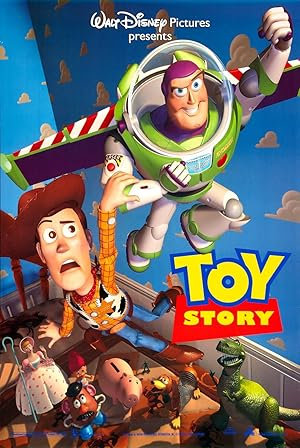

None
Toy Story (1995)


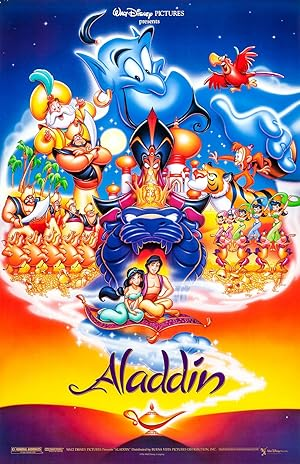

None
Aladdin (1992)


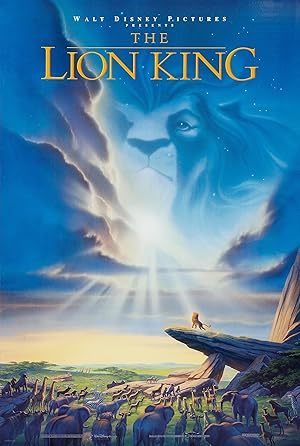

None
Lion King, The (1994)


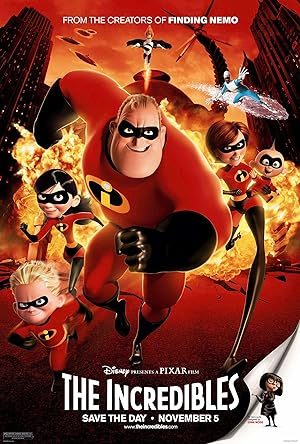

None
Incredibles, The (2004)


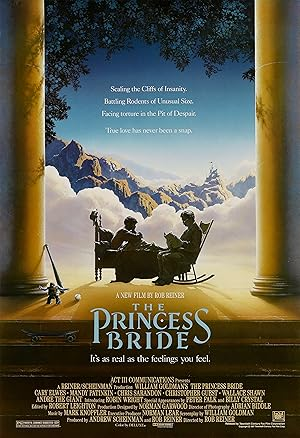

None
Princess Bride, The (1987)


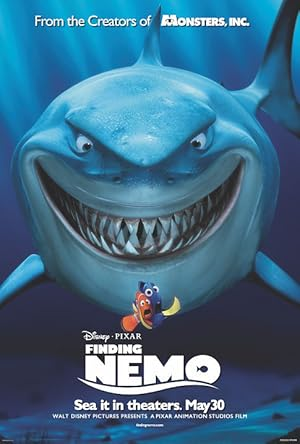

None
Finding Nemo (2003)


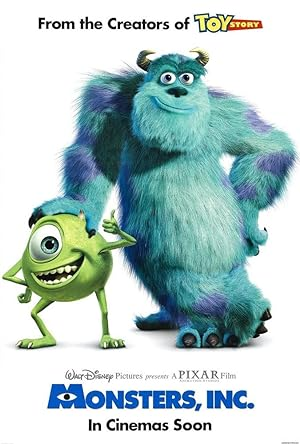

None
Monsters, Inc. (2001)


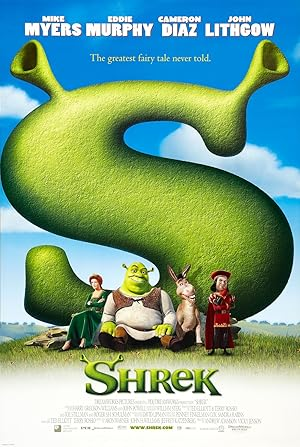

None
Shrek (2001)


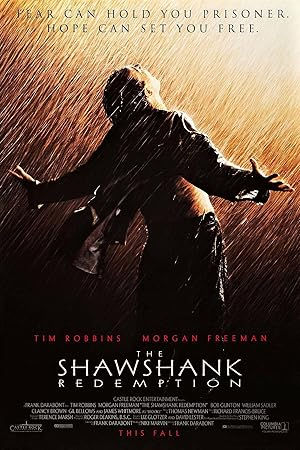

None
Shawshank Redemption, The (1994)


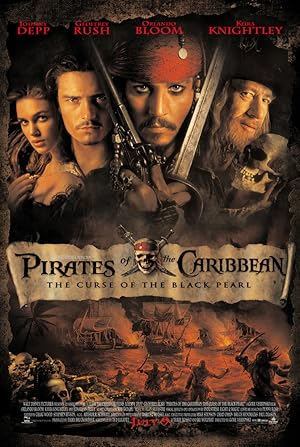

None
Pirates of the Caribbean: The Curse of the Black Pearl (2003)


In [119]:
recommend('Toy Story')

In [123]:
!pip install flask-ngrok

In [129]:
from flask import Flask, render_template, request, jsonify, redirect,url_for
from flask_ngrok import run_with_ngrok
app = Flask(__name__)
#run_with_ngrok(app)

@app.route('/',methods=['GET','POST'])
def index():
    return render_template('index.html')

@app.route('/about',methods=['GET','POST'])
def about():
    return render_template('about.html')

@app.route('/recommend',methods=['GET','POST'])
def recommend():
    movie_df=new_df
    movie_title=movie_df['title'].values
    return render_template('recommend.html',movie_title=movie_title)

@app.route('/recommended_movies' ,methods=['GET','POST'])
def product():
    if request.method=="POST":
        movies=request.form['movies']
        if movies == 'Select movie here':
            return redirect('/')
        else:
            poster,recommended_movies=recommend(movies)
            return render_template('predict.html',movies=movies,recommended_movies=recommended_movies,poster=poster)
    else:
        return render_template('predict.html')


@app.route('/contact',methods=['GET','POST'])
def contact():
    return render_template('contact.html')


if __name__=="__main__":
    app.run(debug=True,port=8000)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:8000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
